# Exploratory Data Analysis on a TITANIC Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Titanic dataset:-

In [2]:

titanic = pd.read_csv("Titanic-Dataset.csv")

#### Display first few rows:-

In [3]:
print("Dataset Preview:")
print(titanic.head())

Dataset Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

#### 1.Basic Information:-

In [4]:
print("Dataset Information:")
print(titanic.info())
# summary Statistics
print("\nSummary Statistics:")
print(titanic.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118   

#### 2.Handling Missing Values:-

In [5]:

print("Missing Values:")
print(titanic.isnull().sum())

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


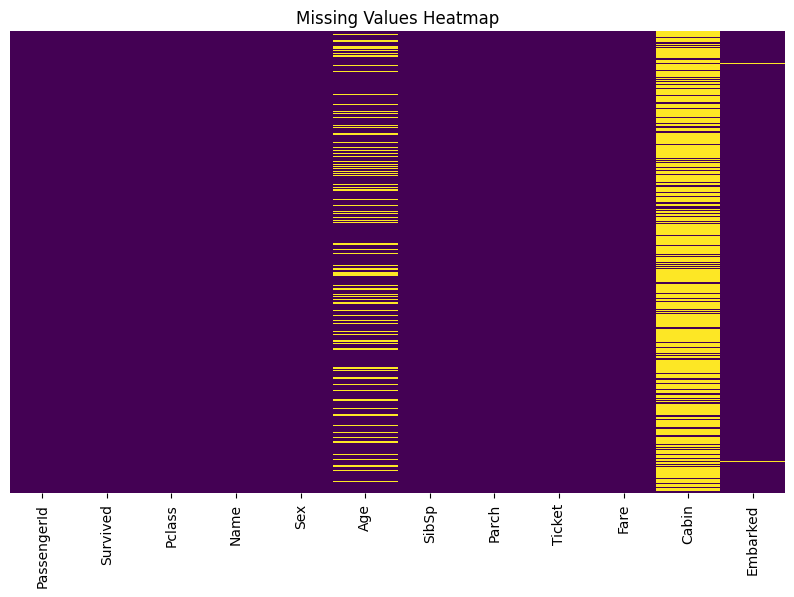

In [6]:
# Visualizing missing values using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
# Filling missing Age values with median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

C:\Users\AA\AppData\Local\Temp\ipykernel_1988\1932955968.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [8]:
# Filling missing Embarked values with mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

C:\Users\AA\AppData\Local\Temp\ipykernel_1988\563474459.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


In [9]:
# Dropping Cabin column due to too many missing values
titanic.drop(columns=['Cabin'], inplace=True)
#Checking missing values again:
print("\nMissing Values After Handling:")
print(titanic.isnull().sum())


Missing Values After Handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### 3. Distribution Analysis:-

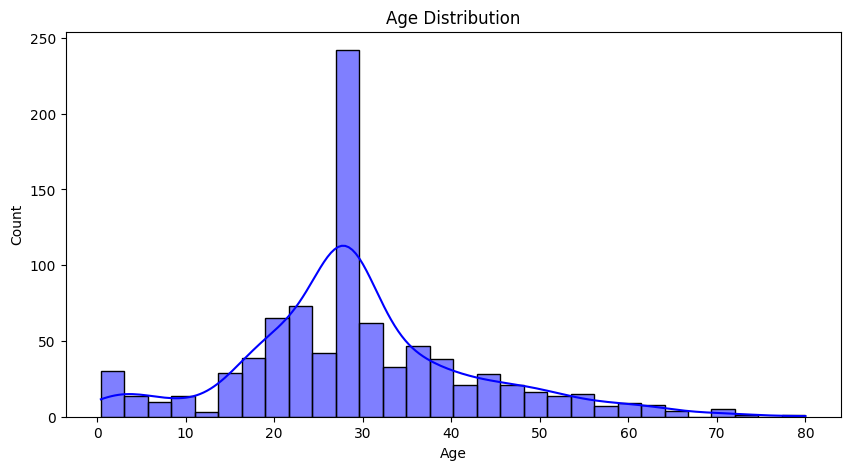

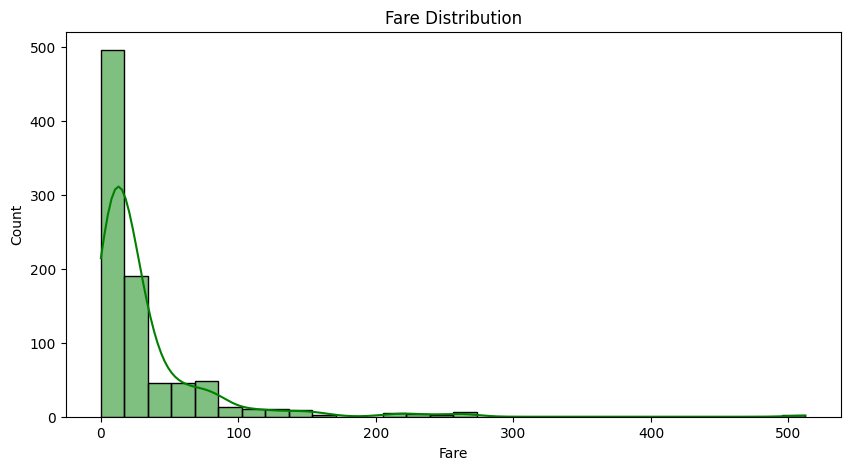

In [10]:
# Plotting the distribution of Age using a histogram, kde=True adds a density curve.
plt.figure(figsize=(10, 5))
sns.histplot(titanic['Age'], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#Plotting the distribution of Fare to see how ticket prices are spread out.
plt.figure(figsize=(10, 5))
sns.histplot(titanic['Fare'], bins=30, kde=True, color="green")
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

#### 4. Correlation Analysis:-

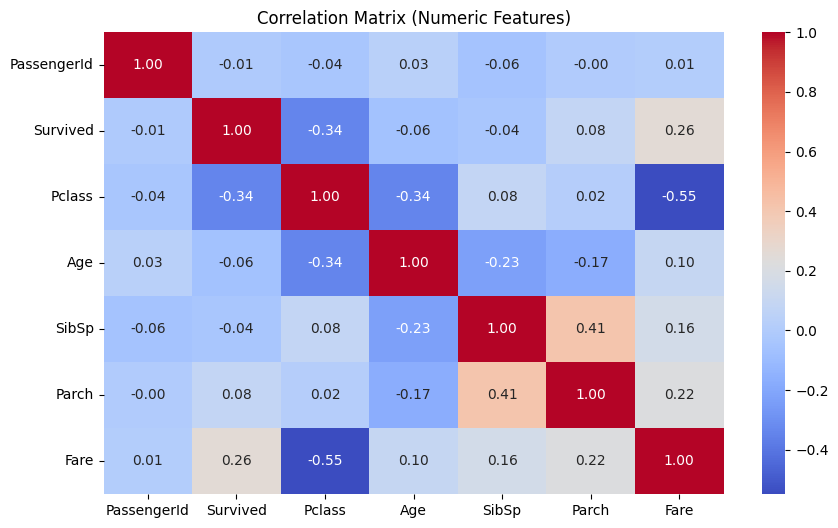

In [11]:
# Select only numeric columns for correlation
numeric_titanic = titanic.select_dtypes(include=['number'])
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_titanic.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


#### 5. Key Insights with Visualizations:-

C:\Users\AA\AppData\Local\Temp\ipykernel_1988\3909924686.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=titanic, palette="viridis", edgecolor='black', linewidth=2)


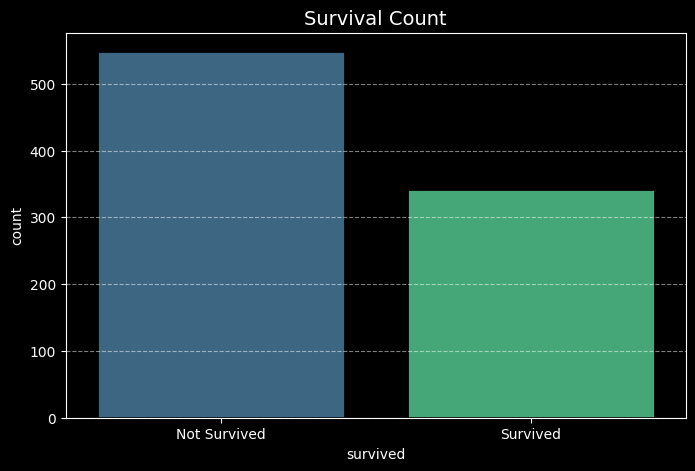

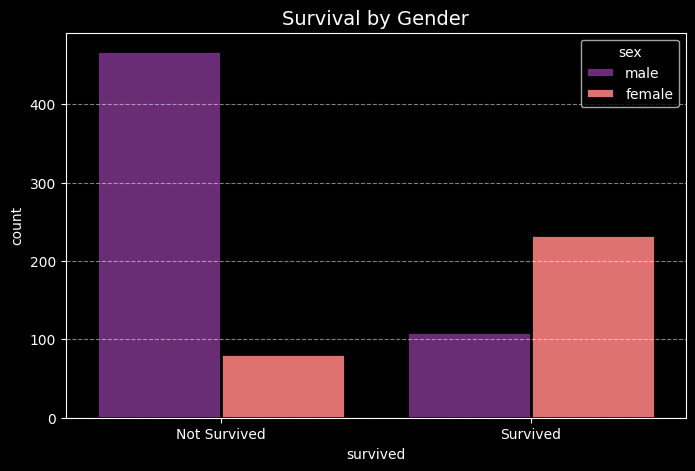

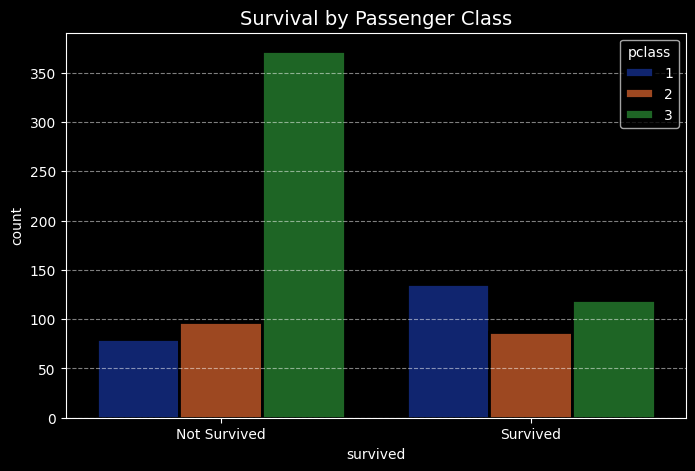

C:\Users\AA\AppData\Local\Temp\ipykernel_1988\3909924686.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic[titanic['survived'] == 1]['age'], shade=True, label="Survived", color="lime", linewidth=2)
C:\Users\AA\AppData\Local\Temp\ipykernel_1988\3909924686.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic[titanic['survived'] == 0]['age'], shade=True, label="Not Survived", color="red", linewidth=2)


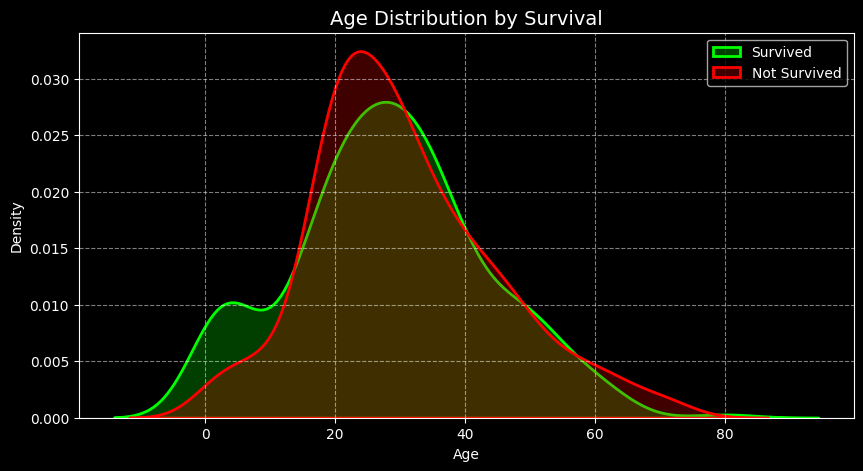

C:\Users\AA\AppData\Local\Temp\ipykernel_1988\3909924686.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='fare', data=titanic, palette="coolwarm", width=0.6, linewidth=2)


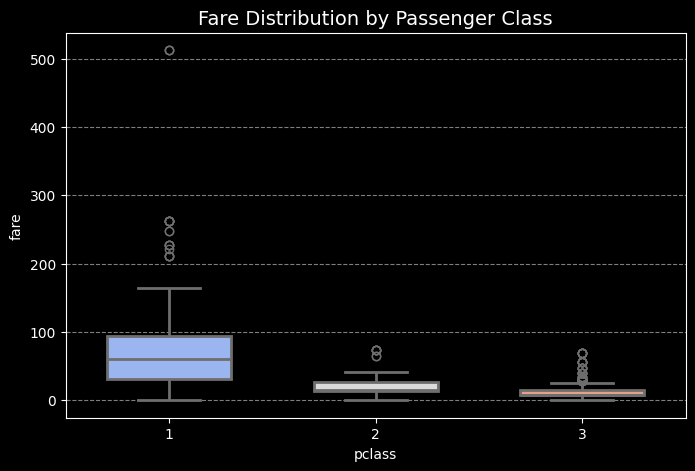

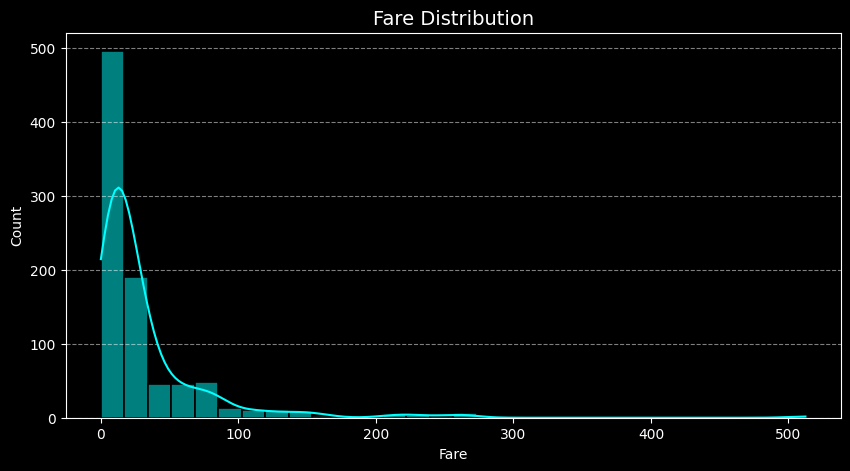

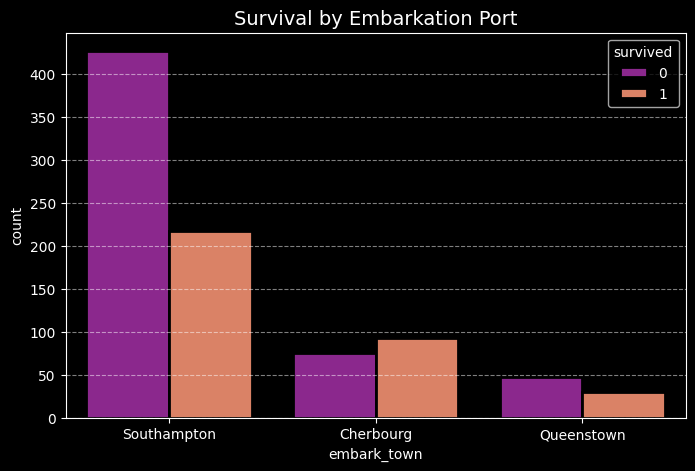

In [15]:
# Set dark theme
plt.style.use("dark_background")



# 1️⃣ Survival Count
plt.figure(figsize=(8,5))
sns.countplot(x='survived', data=titanic, palette="viridis", edgecolor='black', linewidth=2)
plt.title("Survival Count", fontsize=14)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 2️⃣ Survival by Gender
plt.figure(figsize=(8,5))
sns.countplot(x='survived', hue='sex', data=titanic, palette="magma", edgecolor='black', linewidth=2)
plt.title("Survival by Gender", fontsize=14)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 3️⃣ Survival by Passenger Class
plt.figure(figsize=(8,5))
sns.countplot(x='survived', hue='pclass', data=titanic, palette="dark", edgecolor='black', linewidth=2)
plt.title("Survival by Passenger Class", fontsize=14)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 4️⃣ Age Distribution by Survival
plt.figure(figsize=(10, 5))
sns.kdeplot(titanic[titanic['survived'] == 1]['age'], shade=True, label="Survived", color="lime", linewidth=2)
sns.kdeplot(titanic[titanic['survived'] == 0]['age'], shade=True, label="Not Survived", color="red", linewidth=2)
plt.title("Age Distribution by Survival", fontsize=14)
plt.xlabel("Age")
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# 5️⃣ Box Plot of Fare by Passenger Class
plt.figure(figsize=(8,5))
sns.boxplot(x='pclass', y='fare', data=titanic, palette="coolwarm", width=0.6, linewidth=2)
plt.title("Fare Distribution by Passenger Class", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 6️⃣ Fare Distribution (Histogram)
plt.figure(figsize=(10,5))
sns.histplot(titanic['fare'], bins=30, kde=True, color="cyan", edgecolor='black', linewidth=1.2)
plt.title("Fare Distribution", fontsize=14)
plt.xlabel("Fare")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 7️⃣ Survival by Embarkation Port
plt.figure(figsize=(8,5))
sns.countplot(x='embark_town', hue='survived', data=titanic, palette="plasma", edgecolor='black', linewidth=2)
plt.title("Survival by Embarkation Port", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
